# Homework 8: Predicting Ground State Energy

In this homework, your goal is to predict the energy of the ground state of a molecule, and to reach to lowest possible error on the test set. You must report your score on a scoreboard:

https://keepthescore.co/board/ffirhduscve/

For this homework, you will use a library called score, which provides you with 1 function. 
<ul> 
    <li> test(features,model): features should be a list of mordred features. model should be a scikit learn estimator. return the mean average error on the test set.
</ul>
At the end of this notebook, you will find an example on how to define a model and test it. You should use datasets A, B, C, D, F, G, H, I for your work. You are encouraged to use multiple datasets!<br>
One final note: your position on the scoreboard does matter. If you are doing much worse than your peers, you can expect to receive fewer points. 

In [1]:
from score import test

**Rules**:<br>
<ul>
    <li> It is forbidden to modify the score library;
    <li> It is forbidden to import any other function from the score library;
    <li> It is forbidden to use dataset E;
    <li> It is forbidden to use any dataset other than A, B, C, D, F, G, H, I;
    <li> It is forbidden to use features others than the ones computed from mordred;
    <li> You can use any number of features, however, at the end, you will need to provide a brief (and vague) explanation of what your features are doing.
    <li> You can use anything you want for modeling, including all the tools available in pytorch, and you can even use other machine libraries if you wish;
    <li> It is forbidden to modify the scoreboard page (be careful, you all have admin access to it).
</ul>
It is very easy to cheat and I rely on your integrity to participate in good faith. If you are caught cheating, you will get 0 for the assignment. 

## Some advice

<ul>
<li> For this project, you will have to work using several notebooks.
<li> You should start by writing a notebook to create the dataset. Note that if you use many molecules, using MOPAC could take a while. If you decide to optimize the geometry of all the molecules in the Solubility datasets, ot will take at least 12 hours. Make sure to save the result so that you don't have to compute it multiple times!
<li> You should probably have another separate notebook that creates the graph version of the dataset. Again, you should save the data, and for this make use to use the save_graph and load_graph functions of DGL.
<li> Finally, you should have at least one notebook where you define and train your notebook.
<li> As an example, my Reference submission was defined using 5 notebooks...
</ul>

## Example

In [2]:
import numpy as np
from sklearn.dummy import DummyRegressor

In [3]:
def dummy_E0():
    model = DummyRegressor()
    model.fit(None,np.array([42]))
    return lambda smiles: model.predict(smiles)

In [5]:
test(dummy_E0(),'Reference')

Your score is worse than your previous best score, it will not be reported.


52101.286045329194

## Your turn

Structure determines property

Spatial arrangement of nuclei is important
Other important factors:
  energy
  forces ating on neclei
  bonds
  
Potential Energy Surface
    R^(3N) --> R
    
**What will be the geometry of X (say, CH3) that will minimize its energy (use potential energy surface)?**

Problem: Predict ground state energy of a molecule given the formula (assuming it's in that lowest energy state defined above) (I think we need to compute this)

1. Data
2. Graph it
3. Use quantum mechanics (find structure that will minimize energy... and what is this energy) (You can find this on each of the datasets using a third party software... ~13 hours (excluding dataset A)
4. Using graph neural networks, feed this data and then it can predict it




In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from ase import Atoms
from ase.io import read
from ase.calculators.mopac import MOPAC


In [2]:
mol = Chem.MolFromSmiles('C=C')

In [3]:
mol = Chem.AddHs(mol)

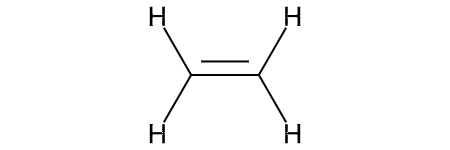

In [4]:
mol

In [5]:
# Create a geometry for this molecule (there can be many different geometries) in cartesian space
AllChem.EmbedMolecule(mol)

0

In [6]:
Chem.rdmolfiles.MolToXYZFile(mol, 'foo.xyz')

In [9]:
for l in open('foo.xyz'):
    print(l, end='')

6

C     -0.616724    0.034582    0.199602
C      0.635136   -0.033876   -0.205262
H     -1.215479   -0.877337    0.227547
H     -1.027850    0.994077    0.496922
H      1.018489   -0.997941   -0.494664
H      1.206427    0.880496   -0.224144


In [10]:
mol = read('foo.xyz')

In [11]:
mol

Atoms(symbols='C2H4', pbc=False)

In [12]:
mol.get_positions()

array([[-0.616724,  0.034582,  0.199602],
       [ 0.635136, -0.033876, -0.205262],
       [-1.215479, -0.877337,  0.227547],
       [-1.02785 ,  0.994077,  0.496922],
       [ 1.018489, -0.997941, -0.494664],
       [ 1.206427,  0.880496, -0.224144]])

In [13]:
# Attach quantum calculation to the molecule itself
mol.calc = MOPAC(label='TMP', task='1SCF UHF BONDS GRADS')

# label = Just a name to keep track of
# task = If that keyword is there, it will not try to optimize the molecule and find the ground state
# task is case sensitive and are space separated commands

# 1SCF only (stop there)


In [14]:
# This is our spot in the graph, the potential energy for this structure. We want to minimize this number
mol.get_potential_energy()

# Note: This is measured in electron volts

-298.76061

In [15]:
# Can also get total energy and electronic energy
# The forces are minus of the gradient
# We don't know the total potential energy surface, only the given point
# So, we find this minimum with conservation of energy (can figure out what the gradient of the bhs? is)
# Can apply gradient descent on potential energy surface to find interesting points
# Look at second order derivatives to see if found ground zero. Should be 0
# For now, this library does this for us automatically? Uses Hellmann Feynman

# No such thing as a bond, it can actually be computed. This software can show us this with valencies and bond orders
# Tells us that the Carbon atom has sharing of energy with second carbon atom and the energy sharing with it
# 0.5-1.5 is a single bond, 1.5 - 2.5 is a double bond

In [16]:
# Automatically optimize molecule
mol.calc = MOPAC(label='TMP', task='UHF BONDS GRADS')

# Removing 1SCF


In [18]:
mol.get_potential_energy() # Cubic in number of atoms. COSTLY (but this is why ML is so useful in chemistry)

-298.91783

In [19]:
# To be quicker, optimize with force field from RDKit before dumping the positions, then MOPAC will be quicker

In [ ]:
# Optimization uses time independent electronic Shrodinger equation for hte molecular hamiltonian
# If solved, could invent vaccines, would solve environmental issues, etc. **Insanely difficult**

# What is Molecular Hamiltonian?
# F = ma (potential plus kinetic energy of the molecule)
# Kinetic energy of molecule is
#    kinetic of nuclei (Tn) with some plank constant in there + same for electrons (Te) + potential energy
#    Tn + Te + Uee (electron repulse) + Unn (nuclei repulse) + Une (nuclei electron attract)

# Wave function W (Goes from R(3N + 3E) --> C, the complex numbers)
# This will describe the state of our molecules 
# Complex norm of this |W(x)|^2 will be a probability density function
# ih dW(x, t) / dt = H W(x, t)